In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

matching_dataframe = pd.read_csv('matching_dataframe.csv')

In [ ]:
matching_dataframe.columns

Index(['resume_id', 'job_id', 'all-mpnet-base-v2_score',
       'paraphrase-MiniLM-L6-v2_score', 'all-MiniLM-L12-v1_score',
       'all-roberta-large-v1_score', 'bert_base_nli_mean_tokens_score'],
      dtype='object')

In [ ]:
matching_dataframe.head()

,resume_id,job_id,all-mpnet-base-v2_score,paraphrase-MiniLM-L6-v2_score,all-MiniLM-L12-v1_score,all-roberta-large-v1_score,bert_base_nli_mean_tokens_score
0,pdf_resume_1001,Full-stack Developer.txt,0.495,0.339,0.492,0.451,0.782
1,pdf_resume_1001,Full-stack Developer.txt,0.495,0.339,0.492,0.451,0.782
2,pdf_resume_1020,Full-stack Developer.txt,0.611,0.602,0.611,0.576,0.849
3,pdf_resume_1024,Full-stack Developer.txt,0.427,0.277,0.391,0.325,0.789
4,pdf_resume_1031,Full-stack Developer.txt,0.119,0.067,0.126,0.240,0.715


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get the list of models to evaluate
models = ['all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score', 'all-MiniLM-L12-v1_score', 'all-roberta-large-v1_score', 'bert_base_nli_mean_tokens_score']

# Group the DataFrame by job_id
grouped_df = matching_dataframe.groupby('job_id')

# Initialize a dictionary to store the accuracy scores for each model
accuracy_scores = {model: [] for model in models}

# Loop through each group
for job_id, group in grouped_df:
    # Get the features (i.e., model scores) and target variable
    X = group[models].values
    y = np.where(group['job_id'] == job_id, 1, 0)

    # Calculate the accuracy score for each model
    for i, model in enumerate(models):
        scores = X[:, i]
        y_pred = np.where(scores == np.max(scores), 1, 0)
        acc = accuracy_score(y, y_pred)
        accuracy_scores[model].append(acc)

# Print the average accuracy score for each model
for model, scores in accuracy_scores.items():
    avg_acc = np.mean(scores)
    print(f"Model: {model}, Average accuracy: {avg_acc:.4f}")


Model: all-mpnet-base-v2_score, Average accuracy: 0.0014
Model: paraphrase-MiniLM-L6-v2_score, Average accuracy: 0.0011
Model: all-MiniLM-L12-v1_score, Average accuracy: 0.0014
Model: all-roberta-large-v1_score, Average accuracy: 0.0011
Model: bert_base_nli_mean_tokens_score, Average accuracy: 0.0011


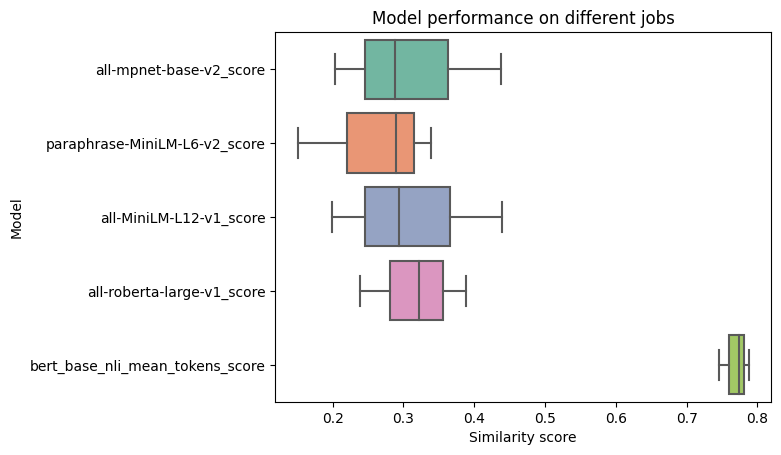

F-statistic: 4794.645280175072, p-value: 0.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the data
matching_df = pd.read_csv('matching_dataframe.csv')

# Calculate the average score for all models for each job posting
matching_df['avg_score'] = matching_df.iloc[:, 2:].mean(axis=1)

# Create a new dataframe containing only the similarity scores for each model for each job posting separately
model_scores = matching_df.groupby(['job_id'])[matching_df.columns[2:-1]].mean()

# Visualize the average scores for each model using box plots
sns.boxplot(data=model_scores, orient='h', palette='Set2')
plt.title('Model performance on different jobs')
plt.xlabel('Similarity score')
plt.ylabel('Model')
plt.show()

# Use ANOVA to compare the performance of the different models
f_stat, p_val = f_oneway(matching_df['all-mpnet-base-v2_score'], 
                         matching_df['paraphrase-MiniLM-L6-v2_score'], 
                         matching_df['all-MiniLM-L12-v1_score'], 
                         matching_df['all-roberta-large-v1_score'], 
                         matching_df['bert_base_nli_mean_tokens_score'])
print(f'F-statistic: {f_stat}, p-value: {p_val}')


       all-mpnet-base-v2_score  paraphrase-MiniLM-L6-v2_score  \
count              2818.000000                    2818.000000   
mean                  0.309883                       0.259802   
std                   0.185751                       0.179112   
min                   0.000000                       0.000000   
25%                   0.173000                       0.100000   
50%                   0.320000                       0.246000   
75%                   0.458000                       0.385750   
max                   0.776000                       0.739000   

       all-MiniLM-L12-v1_score  all-roberta-large-v1_score  \
count              2818.000000                 2818.000000   
mean                  0.310290                    0.316340   
std                   0.187137                    0.164987   
min                   0.000000                    0.000000   
25%                   0.171000                    0.190000   
50%                   0.324000            

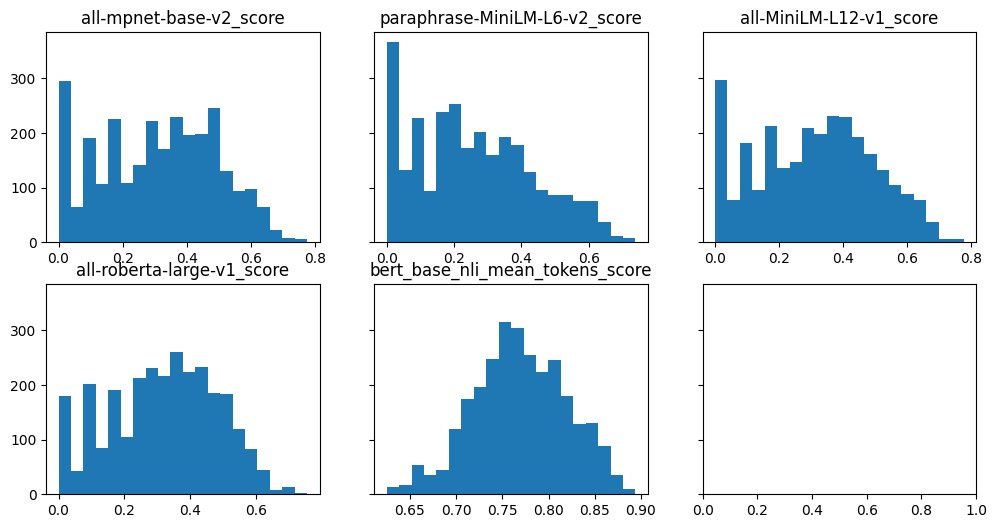

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the matching dataframe
matching_dataframe = pd.read_csv('matching_dataframe.csv')

# Calculate summary statistics for each score column
summary_stats = matching_dataframe.describe()

# Plot histograms for each score column
fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharey=True)
axs = axs.ravel()
for i, score_col in enumerate(['all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score', 
                               'all-MiniLM-L12-v1_score', 'all-roberta-large-v1_score',
                               'bert_base_nli_mean_tokens_score']):
    axs[i].hist(matching_dataframe[score_col], bins=20)
    axs[i].set_title(score_col)

# Display the summary statistics
print(summary_stats)


In [ ]:
import scipy.stats as stats

# Compute the Spearman's rank correlation coefficient between the BERT model and the other models
corr_matrix = matching_dataframe[['all-mpnet-base-v2_score', 'paraphrase-MiniLM-L6-v2_score',
                                  'all-MiniLM-L12-v1_score', 'all-roberta-large-v1_score',
                                  'bert_base_nli_mean_tokens_score']].corr(method='spearman')
bert_corr = corr_matrix['bert_base_nli_mean_tokens_score'].drop('bert_base_nli_mean_tokens_score')
mean_corr = bert_corr.mean()
print(f"Mean rank correlation between BERT model and other models: {mean_corr:.3f}")


Mean rank correlation between BERT model and other models: 0.787


In [ ]:
bert_base = pd.read_csv('bert_base.csv')